In [55]:
import numpy as np
import math
import sys
import random
import copy
import json
def processing_data(fname):
    fin = open(fname, 'r')
    a = fin.readlines()
    fout = open("att48.txt", 'w')
    b = ''.join(a[6:-1])
    fout.write(b)


def read_coordinate(fname):
    coordiante = []
    with open("att48.txt") as f:
        for each_line in f:
            tmp = each_line.split()
            xy = [int(tmp[1]), int(tmp[2])]
            coordiante.append(xy)
    return coordiante

In [33]:
def getdis(coordinate):
    num = int(coordinate.shape[0])
    dis_mat = np.zeros((num, num))
    for i in range(num):
        for j in range(i, num):
            d_x = coordinate[i][0] - coordinate[j][0]
            d_y = coordinate[i][1] - coordinate[j][1]
            rij = math.sqrt((d_x * d_x + d_y * d_y) / 10)
            tij = round(rij)
            if tij == 0:
                dis_mat[i][j] = dis_mat[j][i] = sys.maxsize
            else:
                dis_mat[i][j] = dis_mat[j][i] = int(tij) if tij > rij else int(tij) + 1
    return dis_mat

In [34]:
def cal_dis(route,distance, n):
    sumdis = 0
    for i in range(n - 1):
        sumdis += distance[route[i]][route[i+1]]
    sumdis += distance[route[n-1]][route[0]]     
    return sumdis

In [48]:
def get_new_route(route, times, n):
    current = copy.copy(route)
    
    if times % 2 == 0:
        u = random.randint(0, n-1)
        v = random.randint(0, n-1)
        temp = current[u]
        current[u] = current[v]
        current[v] = temp
    else:
        temp2 = random.sample(range(0, n), 3)
        temp2.sort()
        u = temp2[0]
        v = temp2[1]
        w = temp2[2]
        w1 = w + 1
        temp3 = [0 for col in range(v - u + 1)]
        j =0
        for i in range(u, v + 1):
            temp3[j] = current[i]
            j += 1
        
        for i2 in range(v + 1, w + 1):
            current[i2 - (v-u+1)] = current[i2]
        w = w - (v-u+1)
        j = 0
        for i3 in range(w+1, w1):
            current[i3] = temp3[j]
            j += 1
    return current
    

In [77]:
def main(T0, T1, ite, alpha):
    processing_data("att48.tsp")
    data_list = read_coordinate("att48.txt")
    coordinate = np.array(data_list)
    dis_mat = getdis(coordinate)
    n = coordinate.shape[0]
    route = random.sample(range(0, n), n) 
    total_dis = cal_dis(route, dis_mat, n)
    print("初始路线：", route)
    print("初始距离：", total_dis)
    newroute = []
    new_total_dis = 0.0
    best = route
    best_total_dis = total_dis
    t = T0
    while True:
        if t <= T1:
            break
        #令温度为初始温度
        for rt2 in range(ite):
            newroute = get_new_route(route, rt2, n)
            new_total_dis = cal_dis(newroute, dis_mat, n)
            delt = new_total_dis - total_dis
            if delt <= 0:
                route = newroute
                total_dis = new_total_dis
                if best_total_dis > new_total_dis:
                    best = newroute
                    best_total_dis = new_total_dis
            elif delt > 0:
                p = math.exp(-delt / t)
                ranp = random.uniform(0, 1)
                if ranp < p:
                    route = newroute
                    total_dis = new_total_dis
        t = t * alpha
    print("现在温度为：", int(t))
    print("最佳路线：", best)
    print("最佳距离：", best_total_dis)
    dic = {
        "best distance:": best_total_dis,
        "original temperature:": T0,
        "end temperature:": T1,
        "alpha:": alpha,
        "best route:": best
    }
    js = json.dumps(dic)
    fileObject = open('sa.txt', 'a+')
    fileObject.write(js)
    fileObject.write('\n')
    fileObject.close()
    

In [95]:
for i in range(31):
    main(100, 1e-8, 3000, 0.97)

初始路线： [21, 6, 15, 13, 26, 35, 29, 14, 0, 44, 30, 22, 3, 25, 11, 18, 40, 47, 5, 39, 43, 45, 9, 24, 7, 2, 38, 33, 20, 8, 19, 16, 23, 28, 37, 12, 4, 42, 46, 10, 31, 32, 1, 34, 36, 17, 41, 27]
初始距离： 50287.0
现在温度为： 0
最佳路线： [39, 10, 12, 24, 13, 22, 2, 21, 15, 40, 33, 47, 4, 28, 1, 41, 25, 3, 34, 44, 9, 23, 31, 38, 20, 46, 19, 11, 14, 32, 45, 35, 29, 42, 16, 26, 18, 36, 5, 27, 6, 17, 43, 30, 37, 7, 0, 8]
最佳距离： 10856.0
初始路线： [22, 27, 16, 28, 23, 5, 43, 29, 24, 35, 40, 14, 38, 6, 32, 9, 45, 47, 37, 36, 15, 20, 30, 19, 11, 10, 3, 18, 34, 33, 21, 46, 0, 13, 41, 17, 1, 25, 31, 12, 44, 7, 2, 26, 42, 4, 8, 39]
初始距离： 52332.0
现在温度为： 0
最佳路线： [31, 23, 9, 44, 34, 3, 25, 41, 1, 28, 4, 47, 24, 13, 33, 40, 15, 21, 2, 39, 8, 0, 7, 37, 30, 43, 17, 6, 27, 5, 36, 18, 26, 16, 42, 29, 35, 45, 32, 14, 11, 19, 46, 10, 22, 12, 20, 38]
最佳距离： 10767.0
初始路线： [39, 38, 37, 31, 5, 16, 21, 44, 45, 4, 43, 29, 27, 7, 20, 9, 35, 24, 3, 23, 15, 8, 25, 33, 36, 22, 10, 32, 47, 26, 17, 14, 46, 0, 41, 12, 28, 42, 13, 40, 34, 19, 18

现在温度为： 0
最佳路线： [41, 23, 9, 44, 34, 3, 25, 1, 28, 40, 33, 2, 21, 15, 0, 7, 8, 37, 30, 43, 17, 6, 27, 5, 36, 18, 26, 16, 42, 29, 35, 45, 32, 19, 11, 14, 39, 10, 22, 13, 24, 12, 46, 20, 31, 38, 47, 4]
最佳距离： 10711.0
初始路线： [0, 24, 29, 1, 10, 30, 46, 12, 21, 47, 5, 16, 11, 23, 38, 39, 33, 36, 44, 34, 32, 45, 17, 19, 41, 42, 22, 26, 7, 27, 25, 15, 2, 8, 9, 3, 4, 37, 20, 6, 31, 35, 43, 28, 14, 18, 13, 40]
初始距离： 50083.0
现在温度为： 0
最佳路线： [25, 1, 28, 33, 40, 15, 21, 2, 22, 13, 24, 12, 10, 11, 14, 39, 8, 0, 7, 37, 30, 43, 17, 6, 27, 5, 36, 18, 26, 16, 42, 29, 35, 45, 32, 19, 46, 20, 31, 38, 47, 4, 41, 23, 9, 44, 34, 3]
最佳距离： 10628.0
初始路线： [17, 39, 0, 9, 44, 19, 47, 5, 38, 18, 32, 36, 26, 2, 4, 35, 31, 15, 27, 40, 10, 41, 12, 43, 37, 1, 21, 3, 20, 23, 42, 46, 22, 30, 45, 14, 7, 8, 11, 29, 25, 33, 13, 6, 34, 16, 24, 28]
初始距离： 51641.0
现在温度为： 0
最佳路线： [41, 1, 28, 4, 47, 33, 40, 15, 21, 2, 22, 10, 11, 14, 39, 8, 0, 7, 37, 30, 43, 17, 6, 27, 29, 42, 16, 26, 18, 36, 5, 35, 45, 32, 19, 46, 20, 12, 13, 24, 38

In [124]:
def mean_di(fname):
    values = []
    fin = open(fname, 'r')
    a = fin.readlines()
    a = a[20:]
    for line in a:
        values.append(json.loads(line)['best distance:'])
    return values
    
res = mean_di('sa.txt')
mean = np.mean(res)
standard = np.std(res)
print(mean)
print(standard)

    

10840.677419354839
126.5240987109989


初始路线： [7, 22, 0, 24, 14, 25, 26, 3, 28, 15, 20, 1, 27, 10, 23, 8, 29, 6, 4, 17, 5, 11, 21, 18, 13, 12, 19, 9, 16, 2]
初始距离： 1514.138229862885
现在温度为： 0
最佳路线： [19, 20, 21, 22, 29, 24, 25, 27, 26, 28, 23, 13, 14, 0, 2, 1, 8, 9, 7, 3, 4, 5, 6, 12, 10, 11, 15, 16, 17, 18]
最佳距离： 430.8973507098079
[83, 71, 67, 64, 80, 84, 87, 71, 71, 58, 52, 36, 39, 1, 6, 3, 21, 22.5, 20, 12, 19, 22, 23, 42, 40, 44, 58, 62, 88, 90, 83]
[44, 42, 57, 59, 66, 65, 74, 77, 70, 68, 62, 83, 95, 99, 64, 50, 60, 60.5, 54, 40, 41, 42, 37, 35, 26, 20, 33, 30.5, 6, 38, 44]


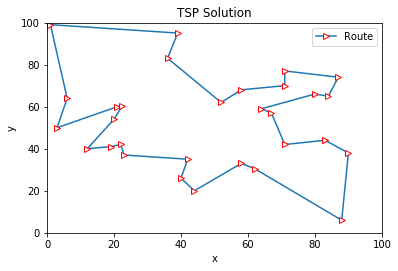

In [21]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt
import sys
import copy

'''
记录错误，数组直接复制是复制地址
例如， current = route
想要得到一个新的有同样内容的数组，应该用： current = copy.copy(route) 
'''

#初始三十个城市坐标
city_x = [1,3,6,12,19,22,23,20,21,22.5,40,44,42,36,39,58,62,88,90,83,71,67,64,52,84,87,71,71,58,80]
city_y = [99,50,64,40,41,42,37,54,60,60.5,26,20,35,83,95,33,30.5,6,38,44,42,57,59,62,65,74,70,77,68,66]
#城市数量
n = 30
distance = [[0 for col in range(n)] for raw in range(n)]
#初始温度 结束温度
T0 = 30
Tend = 1e-8
#循环控制常数
L = 10
#温度衰减系数
a = 0.98

#构建初始参考距离矩阵
def getdistance():
    for i in range(n):
        for j in range(n):
            x = pow(city_x[i] - city_x[j], 2)
            y = pow(city_y[i] - city_y[j], 2)
            distance[i][j] = pow(x + y, 0.5)
    for i in range(n):
        for j in range(n):
            if distance[i][j] == 0:
                distance[i][j] = sys.maxsize

#计算总距离
def cacl_best(rou):
    sumdis = 0.0
    for i in range(n-1):
        sumdis += distance[rou[i]][rou[i+1]]
    sumdis += distance[rou[n-1]][rou[0]]     
    return sumdis

#得到新解
def getnewroute(route, time):
    #如果是偶数次，二变换法
    current = copy.copy(route)
    
    if time % 2 == 0:
        u = random.randint(0, n-1)
        v = random.randint(0, n-1)
        temp = current[u]
        current[u] = current[v]
        current[v] = temp
    #如果是奇数次，三变换法 
    else:
        temp2 = random.sample(range(0, n), 3)
        temp2.sort()
        u = temp2[0]
        v = temp2[1]
        w = temp2[2]
        w1 = w + 1
        temp3 = [0 for col in range(v - u + 1)]
        j =0
        for i in range(u, v + 1):
            temp3[j] = current[i]
            j += 1
        
        for i2 in range(v + 1, w + 1):
            current[i2 - (v-u+1)] = current[i2]
        w = w - (v-u+1)
        j = 0
        for i3 in range(w+1, w1):
            current[i3] = temp3[j]
            j += 1
    
    return current
    
def draw(best):
    result_x = [0 for col in range(n+1)]
    result_y = [0 for col in range(n+1)]
    
    for i in range(n):
        result_x[i] = city_x[best[i]]
        result_y[i] = city_y[best[i]]
    result_x[n] = result_x[0]
    result_y[n] = result_y[0]
    print(result_x)
    print(result_y)
    plt.xlim(0, 100)  # 限定横轴的范围
    plt.ylim(0, 100)  # 限定纵轴的范围
    plt.plot(result_x, result_y, marker='>', mec='r', mfc='w',label=u'Route')
    plt.legend()  # 让图例生效
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(u"x") #X轴标签
    plt.ylabel(u"y") #Y轴标签
    plt.title("TSP Solution") #标题
    
    plt.show()
    plt.close(0)      
    
def solve():
    #得到距离矩阵
    getdistance()
    #得到初始解以及初始距离
    route = random.sample(range(0, n), n) 
    total_dis = cacl_best(route)
    print("初始路线：", route)
    print("初始距离：", total_dis)
    #新解
    newroute = []
    new_total_dis = 0.0
    best = route
    best_total_dis = total_dis
    t = T0
    
    while True:
        if t <= Tend:
            break
        #令温度为初始温度
        for rt2 in range(L):
            newroute = getnewroute(route, rt2)
            new_total_dis = cacl_best(newroute)
            delt = new_total_dis - total_dis
            if delt <= 0:
                route = newroute
                total_dis = new_total_dis
                if best_total_dis > new_total_dis:
                    best = newroute
                    best_total_dis = new_total_dis
            elif delt > 0:
                p = math.exp(-delt / t)
                ranp = random.uniform(0, 1)
                if ranp < p:
                    route = newroute
                    total_dis = new_total_dis
        t = t * a
    print("现在温度为：", int(t))
    print("最佳路线：", best)
    print("最佳距离：", best_total_dis)  
    
    draw(best)   
if __name__=="__main__":
    solve()


